# Работа с файлом данных «Титаника» 
Машинное обучение

Выполнила студентка группы ДИНРм-1 Нурушева А.Р.


---
Приведенные ниже задания основаны на данных 'titanic.csv', где
содержатся сведения о пассажирах «Титаника». 


## Скачивание датасета с Kaggle 
Для этого был сгенерирован API-токен на странице профиля Kaggle 

In [1]:
 ! pip install -q kaggle
 from google.colab import files

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
! mkdir titanic
! unzip titanic.zip -d titanic

mkdir: cannot create directory ‘titanic’: File exists
Archive:  titanic.zip
  inflating: titanic/gender_submission.csv  
  inflating: titanic/test.csv        
  inflating: titanic/train.csv       


## Просмотр данных


---

**Для выполнения всех заданий используется тренировочный датасет (train)**

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [18]:
df = pd.read_csv('/content/titanic/train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# Размерность таблицы
df.shape

(891, 11)

In [19]:
# Список столбцов
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Задание 1
Какое количество мужчин и женщин плыло на корабле?


In [23]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

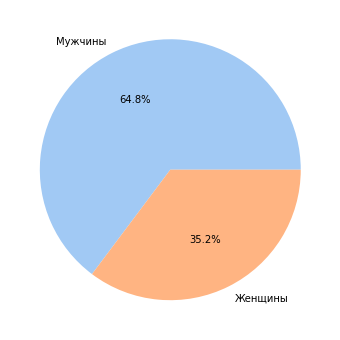

In [85]:
labels = ['Мужчины', 'Женщины']
plt.figure(figsize=(6, 6))
plt.pie(df['Sex'].value_counts(), labels=labels, colors=sn.color_palette('pastel')[0:5], autopct='%1.1f%%');

**Ответ:** 577 Мужчин и 314 Женщин

## Задание 2
Какой части пассажиров удалось выжить? Посчитайте
долю выживших пассажиров. Ответ приведите в процентах (число
в интервале от 0 до 100, знак процента не нужен), округлив до двух
знаков. 


In [29]:
# Распределение невыжившие/выжившие
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [31]:
survived = df['Survived'].value_counts(normalize=True)[1] * 100
round(survived, 2)

38.38

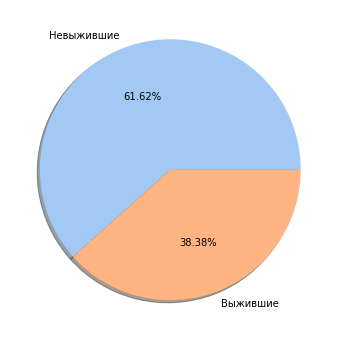

In [89]:
labels = ['Невыжившие', 'Выжившие']
plt.figure(figsize=(6, 6))
plt.pie(df['Survived'].value_counts(), labels=labels, colors=sn.color_palette('pastel')[0:5], autopct='%2.2f%%', shadow=True);

**Ответ:** 38.38% пассажиров выжили

## Задание 3
Какую долю пассажиры первого класса составляли среди
всех пассажиров? Ответ приведите в процентах (число в интервале от
0 до 100, знак процента не нужен), округлив до двух знаков. 



In [32]:
# Распределение пассажиров по классам
df['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [33]:
first_class = survived = df['Pclass'].value_counts(normalize=True)[1] * 100
round(first_class, 2)

24.24

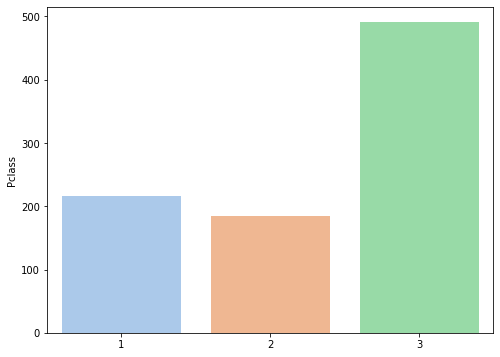

In [117]:
plt.figure(figsize=(8, 6))
sn.barplot(x=df['Pclass'].unique(), y=df['Pclass'].value_counts(), palette=sn.color_palette('pastel')[0:5]);

**Ответ:** 24.24% пассажиров были размещены в первом классе

## Задание 4
Какого возраста были пассажиры? Посчитайте среднее
и медиану возраста пассажиров. В качестве ответа приведите два
числа через пробел.



In [38]:
#Общая информация о числовых данных
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
mean = df['Age'].mean()
median = df['Age'].median()
print(round(mean, 2), median)

29.7 28.0


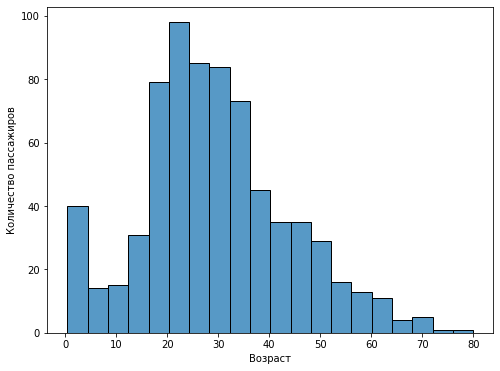

In [129]:
plt.figure(figsize=(8, 6))
sp = sn.histplot(df['Age'])
sp.set_xlabel("Возраст")
sp.set_ylabel("Количество пассажиров");

**Ответ:** среднее = 29.7, медиана = 28.0

## Задание 5
Коррелируют ли число братьев/сестер/супругов с числом
родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch.


---

SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника.

Parch — количество родителей, детей (в том числе приемных) на борту титаника.



In [56]:
corr = np.corrcoef(df['SibSp'], df['Parch'])
new_columns = ['SibSp', 'Parch']
pd.DataFrame(corr, columns=new_columns, index=new_columns)

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


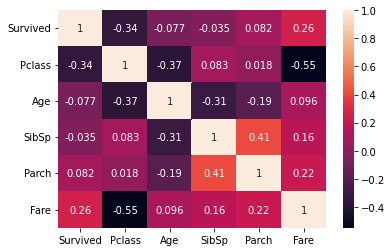

In [135]:
sn.heatmap(df.corr(), annot=True)
plt.show()

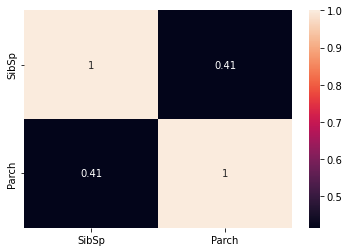

In [67]:
sn.heatmap(df[['SibSp', 'Parch']].corr(), annot=True)
plt.show()

**Ответ:** 0.41

## Задание 6
Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Это задание – типичный пример того, с чем сталкивается специалист по анализу данных. Данные очень разнородные и шумные, но из них требуется извлечь необходимую информацию. Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские. 

In [222]:
#В первую очередь получим список женских имен
female_names = df.loc[df['Sex']=='female']['Name']
female_names

PassengerId
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
9      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                   Nasser, Mrs. Nicholas (Adele Achem)
                             ...                        
881         Shelley, Mrs. William (Imanita Parrish Hall)
883                         Dahlberg, Miss. Gerda Ulrika
886                 Rice, Mrs. William (Margaret Norton)
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
Name: Name, Length: 314, dtype: object

In [213]:
def find_first_name_female(name):
    #сначала находим замужних женщин (содержат 'Mrs')
    first_names = name.str.extract(r"Mrs\.\s+[^(]*\((\w+)", expand=False)
    #затем всех остальных
    first_names.loc[first_names.isna()] = name.str.extract(r"\.\s+(\w+)", expand=False)
    return first_names


In [223]:
female_names = find_first_name_female(female_names)
female_names

PassengerId
2       Florence
3          Laina
4           Lily
9      Elisabeth
10         Adele
         ...    
881      Imanita
883        Gerda
886     Margaret
888     Margaret
889    Catherine
Name: Name, Length: 314, dtype: object

In [224]:
female_names.value_counts()

Anna         15
Mary         14
Elizabeth    11
Margaret     10
Alice         7
             ..
Miriam        1
Helmina       1
Laura         1
Nora          1
Gerda         1
Name: Name, Length: 177, dtype: int64

**Ответ:** самое популярное женское имя на корабле - Anna